In [139]:
import numpy as np # Array handler
import pandas as pd # Data analysis
import seaborn as sns  #Visualization
import matplotlib.pyplot as plt #Visualization

# Preprocessing
from sklearn.preprocessing import LabelEncoder # Handling categorial features
from sklearn.preprocessing import MinMaxScaler # Features scaler
import scipy

# Clustering
from sklearn.cluster import KMeans # Clustering machine learning
from sklearn.metrics import silhouette_score


# Hide Warning
import warnings
warnings.filterwarnings("ignore")

In [140]:
dfRaw = pd.read_csv('data/katalog_gempa.csv')
dfRaw.head()

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning and Preprocessing

**Checking Features Info**

In [141]:
dfRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tgl      92887 non-null  object 
 1   ot       92887 non-null  object 
 2   lat      92887 non-null  float64
 3   lon      92887 non-null  float64
 4   depth    92887 non-null  int64  
 5   mag      92887 non-null  float64
 6   remark   92887 non-null  object 
 7   strike1  2735 non-null   float64
 8   dip1     2735 non-null   float64
 9   rake1    2735 non-null   float64
 10  strike2  2735 non-null   float64
 11  dip2     2735 non-null   float64
 12  rake2    2735 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.2+ MB


**Checking Null Values For Each Column**

In [142]:
dfRaw.isnull().sum()

tgl            0
ot             0
lat            0
lon            0
depth          0
mag            0
remark         0
strike1    90152
dip1       90152
rake1      90152
strike2    90152
dip2       90152
rake2      90152
dtype: int64

**For the purpose of this analysis, the last 7 columns will be removed. We will also rename the columns to a clearer definition.**

In [143]:
df = dfRaw.iloc[:, :-7].copy()
df.columns = ['date', 'time', 'latitude', 'longitude', 'depth', 'magnitude']
df.head()

,date,time,latitude,longitude,depth,magnitude
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3


**Handle 'date' Feature and Create New Features: Month, Quarter and Year**

In [144]:
df['date'] = df['date'].str.replace('/', '-')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['month'] = df['date'].dt.month
tempList = []
for i in df['month'].tolist():
    tempVar = 0
    if (i<4):
        tempVar = 1
    elif(i<7):
        tempVar = 2
    elif(i<10):
        tempVar = 3
    else:
        tempVar = 4
    tempList.append(tempVar)
df['quarter'] = tempList
df['year'] = df['date'].dt.year
df.head()

,date,time,latitude,longitude,depth,magnitude,month,quarter,year
0,2008-11-01,21:02:43.058,-9.18,119.06,10,4.9,11,4,2008
1,2008-11-01,20:58:50.248,-6.55,129.64,10,4.6,11,4,2008
2,2008-11-01,17:43:12.941,-7.01,106.63,121,3.7,11,4,2008
3,2008-11-01,16:24:14.755,-3.30,127.85,10,3.2,11,4,2008
4,2008-11-01,16:20:37.327,-6.41,129.54,70,4.3,11,4,2008


**Handle 'time' Feature and Create New Features: Hours, Minute and Day Period**

In [145]:
df['time'] = df['time'].str.split('.').str[0]
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df['hours'] = df['time'].dt.hour
df['minutes'] = df['time'].dt.minute
tempList = []
for i in df['hours'].tolist():
    tempVar = ''
    if (i<3):
        tempVar = 'Night'
    elif(i<6):
        tempVar = 'Dawn'
    elif(i<12):
        tempVar = 'Morning'
    elif(i<18):
        tempVar = 'Afternoon'
    else:
        tempVar = 'Evening'
    tempList.append(tempVar)
df['dayPeriod'] = tempList
df.head()

,date,time,latitude,longitude,depth,magnitude,month,quarter,year,hours,minutes,dayPeriod
0,2008-11-01,1900-01-01 21:02:43,-9.18,119.06,10,4.9,11,4,2008,21,2,Evening
1,2008-11-01,1900-01-01 20:58:50,-6.55,129.64,10,4.6,11,4,2008,20,58,Evening
2,2008-11-01,1900-01-01 17:43:12,-7.01,106.63,121,3.7,11,4,2008,17,43,Afternoon
3,2008-11-01,1900-01-01 16:24:14,-3.30,127.85,10,3.2,11,4,2008,16,24,Afternoon
4,2008-11-01,1900-01-01 16:20:37,-6.41,129.54,70,4.3,11,4,2008,16,20,Afternoon


**Create New Feature: Earthquake Category**

In [146]:
tempList = []
for i in df['magnitude'].tolist():
    tempVar = ''
    if (i<3):
        tempVar = 'Micro'
    elif (i<4):
        tempVar = 'Minor'
    elif (i<5):
        tempVar = 'Light'
    elif (i<6):
        tempVar = 'Moderate'
    elif (i<7):
        tempVar = 'Strong'
    elif (i<8):
        tempVar = 'Major'
    else:
        tempVar = 'Great'
    tempList.append(tempVar)
df['earthquakeCategory'] = tempList
df.head()

,date,time,latitude,longitude,depth,magnitude,month,quarter,year,hours,minutes,dayPeriod,earthquakeCategory
0,2008-11-01,1900-01-01 21:02:43,-9.18,119.06,10,4.9,11,4,2008,21,2,Evening,Light
1,2008-11-01,1900-01-01 20:58:50,-6.55,129.64,10,4.6,11,4,2008,20,58,Evening,Light
2,2008-11-01,1900-01-01 17:43:12,-7.01,106.63,121,3.7,11,4,2008,17,43,Afternoon,Minor
3,2008-11-01,1900-01-01 16:24:14,-3.30,127.85,10,3.2,11,4,2008,16,24,Afternoon,Minor
4,2008-11-01,1900-01-01 16:20:37,-6.41,129.54,70,4.3,11,4,2008,16,20,Afternoon,Light


**Create New Feature: Season**

In [147]:
tempList = []
for i in df['month'].tolist():
    tempVar = ''
    if ((i>3)&(i<11)):
        tempVar = 'Dry'
    else:
        tempVar = 'Rainy'
    tempList.append(tempVar)
df['season'] = tempList
df.head()

,date,time,latitude,longitude,depth,magnitude,month,quarter,year,hours,minutes,dayPeriod,earthquakeCategory,season
0,2008-11-01,1900-01-01 21:02:43,-9.18,119.06,10,4.9,11,4,2008,21,2,Evening,Light,Rainy
1,2008-11-01,1900-01-01 20:58:50,-6.55,129.64,10,4.6,11,4,2008,20,58,Evening,Light,Rainy
2,2008-11-01,1900-01-01 17:43:12,-7.01,106.63,121,3.7,11,4,2008,17,43,Afternoon,Minor,Rainy
3,2008-11-01,1900-01-01 16:24:14,-3.30,127.85,10,3.2,11,4,2008,16,24,Afternoon,Minor,Rainy
4,2008-11-01,1900-01-01 16:20:37,-6.41,129.54,70,4.3,11,4,2008,16,20,Afternoon,Light,Rainy


**Create New Feature: Depth Category**

Depth measures how deep below the Earth's surface the earthquake occurs, measured in kilometers/km)

In [148]:
tempList = []
for i in df['depth'].tolist():
    tempVar = ''
    if (i<71):
        tempVar = 'Shallow'
    elif (i<301):
        tempVar = 'Intermediate'
    else:
        tempVar = 'Deep'
    tempList.append(tempVar)
df['depthCategory'] = tempList
df.head()

,date,time,latitude,longitude,depth,magnitude,month,quarter,year,hours,minutes,dayPeriod,earthquakeCategory,season,depthCategory
0,2008-11-01,1900-01-01 21:02:43,-9.18,119.06,10,4.9,11,4,2008,21,2,Evening,Light,Rainy,Shallow
1,2008-11-01,1900-01-01 20:58:50,-6.55,129.64,10,4.6,11,4,2008,20,58,Evening,Light,Rainy,Shallow
2,2008-11-01,1900-01-01 17:43:12,-7.01,106.63,121,3.7,11,4,2008,17,43,Afternoon,Minor,Rainy,Intermediate
3,2008-11-01,1900-01-01 16:24:14,-3.30,127.85,10,3.2,11,4,2008,16,24,Afternoon,Minor,Rainy,Shallow
4,2008-11-01,1900-01-01 16:20:37,-6.41,129.54,70,4.3,11,4,2008,16,20,Afternoon,Light,Rainy,Shallow


**Counts of Earthquake events by year**

In [149]:

df['year'].value_counts()

year
2018    12345
2019    12155
2022    10849
2021    10714
2020     8690
2017     7597
2015     5378
2016     5134
2011     3948
2009     3534
2010     3437
2013     2749
2012     2435
2014     2430
2023     1176
2008      316
Name: count, dtype: int64

**Create Clean Foundation DataFrame**

Inluded features:

- year
- quarter
- month
- latitude
- longitude
- depth
- magnitude
- dayPeriod
- earthquakeCategory
- season
- depthCategory
- Year range: 2008 - 2023

In [150]:
df = df[['year','quarter','month','latitude','longitude','depth','magnitude','dayPeriod','earthquakeCategory','season','depthCategory']].copy()
df = df.loc[(df['year']>2010)&(df['year']<2021)]
df = df.reset_index(drop=True)
df.head()

,year,quarter,month,latitude,longitude,depth,magnitude,dayPeriod,earthquakeCategory,season,depthCategory
0,2011,1,1,2.71,129.14,53,4.9,Evening,Light,Rainy,Shallow
1,2011,1,1,-9.57,121.81,12,3.2,Afternoon,Minor,Rainy,Shallow
2,2011,1,1,-2.83,103.88,31,3.5,Afternoon,Minor,Rainy,Shallow
3,2011,1,1,2.93,98.53,112,3.3,Morning,Minor,Rainy,Intermediate
4,2011,1,1,-3.24,100.19,12,3.6,Morning,Minor,Rainy,Shallow


## Exploratory Data Analysis

**Boxplot Numerical Features Distribution**

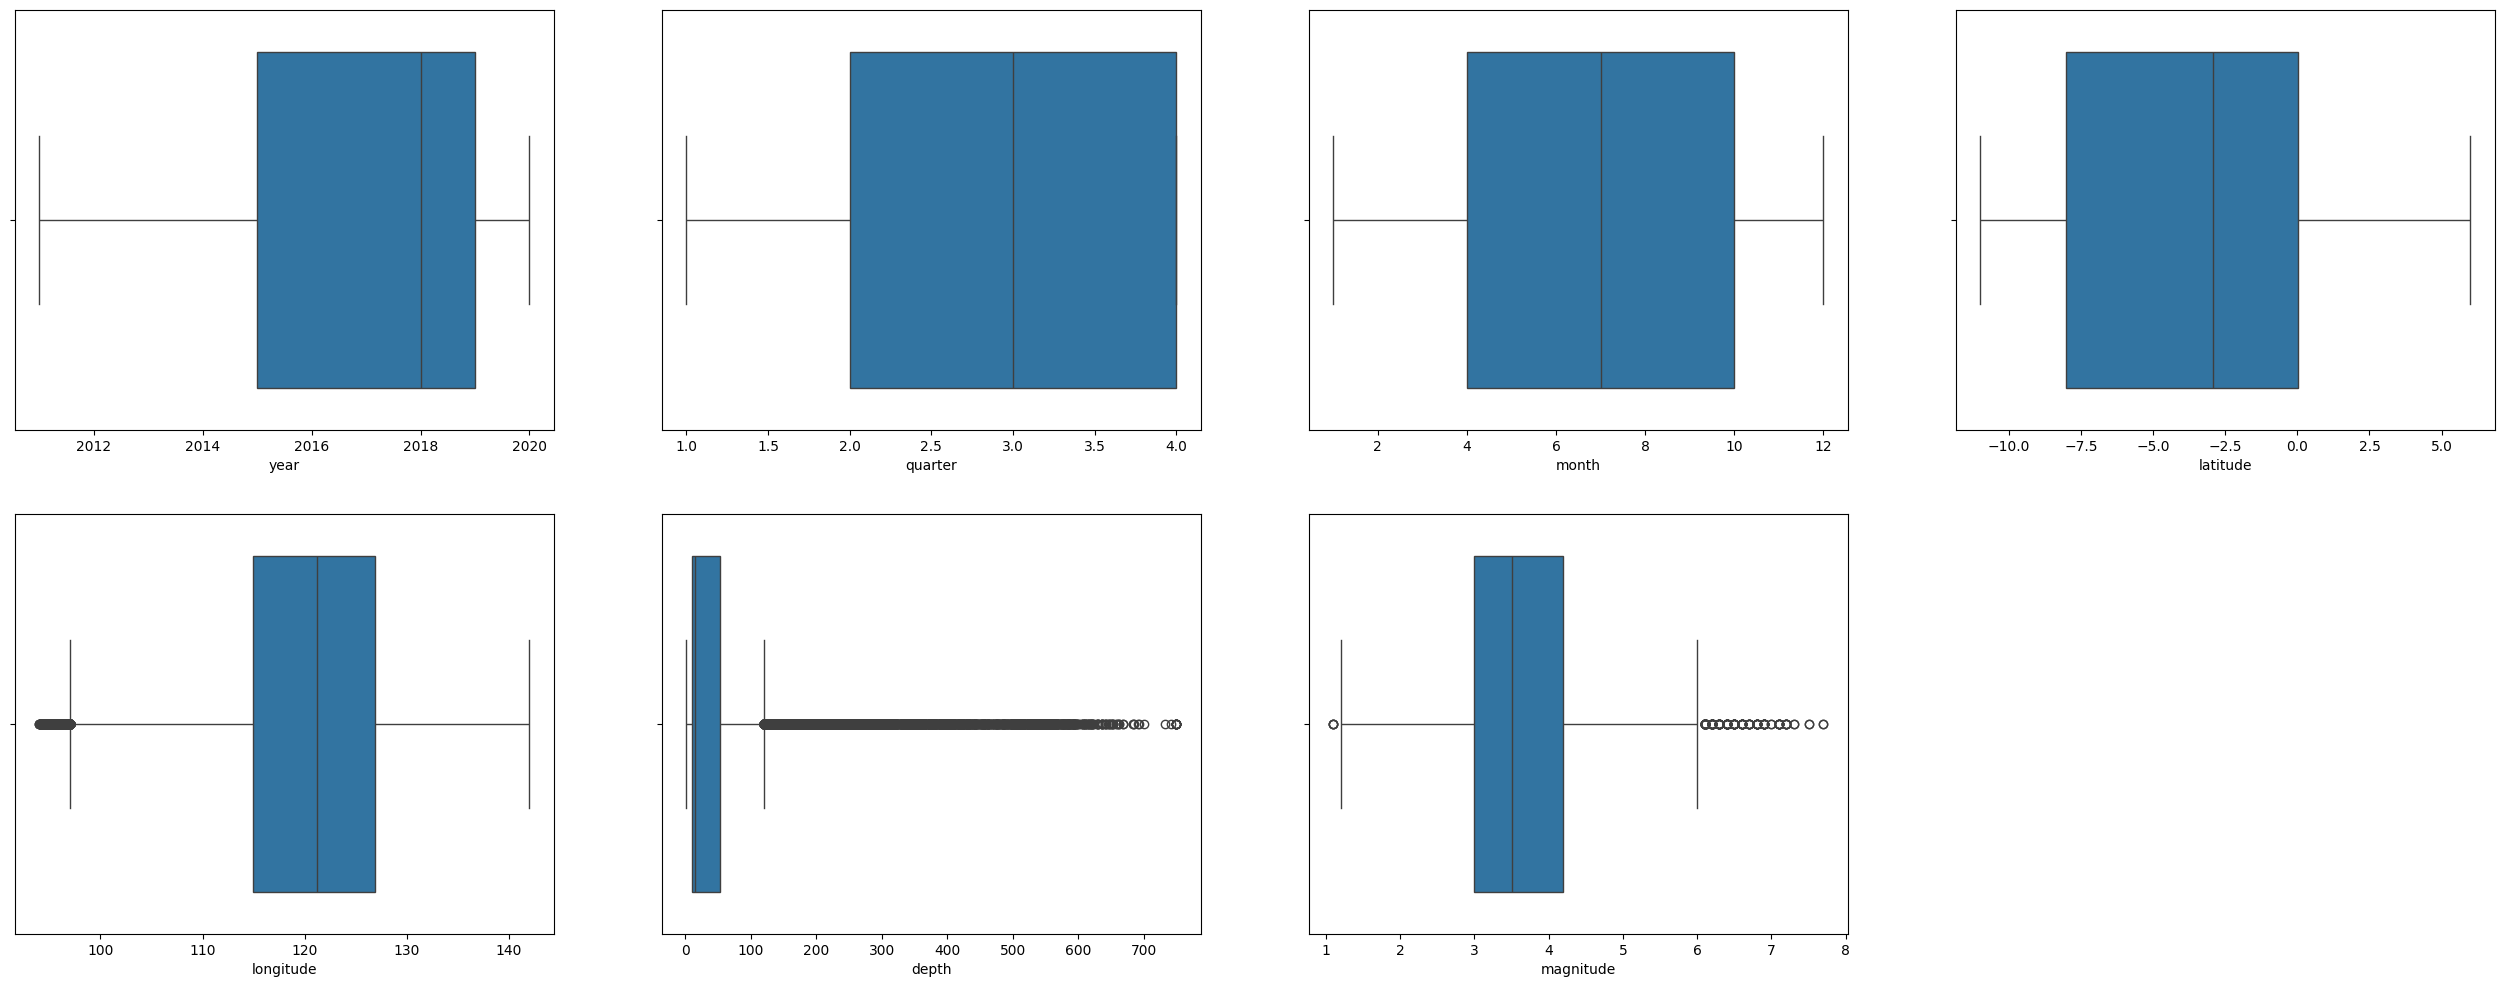

In [151]:
numf = ['year','quarter','month','latitude','longitude','depth','magnitude'] # Numerical Features
catf = ['dayPeriod','earthquakeCategory','season','depthCategory'] # Categorial Features

plt.figure(figsize = (32,12)) 
subplot = 1
for i in numf:
    plt.subplot(2,4,subplot)
    sns.boxplot(data = df, x = i)
    subplot = subplot + 1
    
plt.show()

**Histplot Numerical Features Distrution**

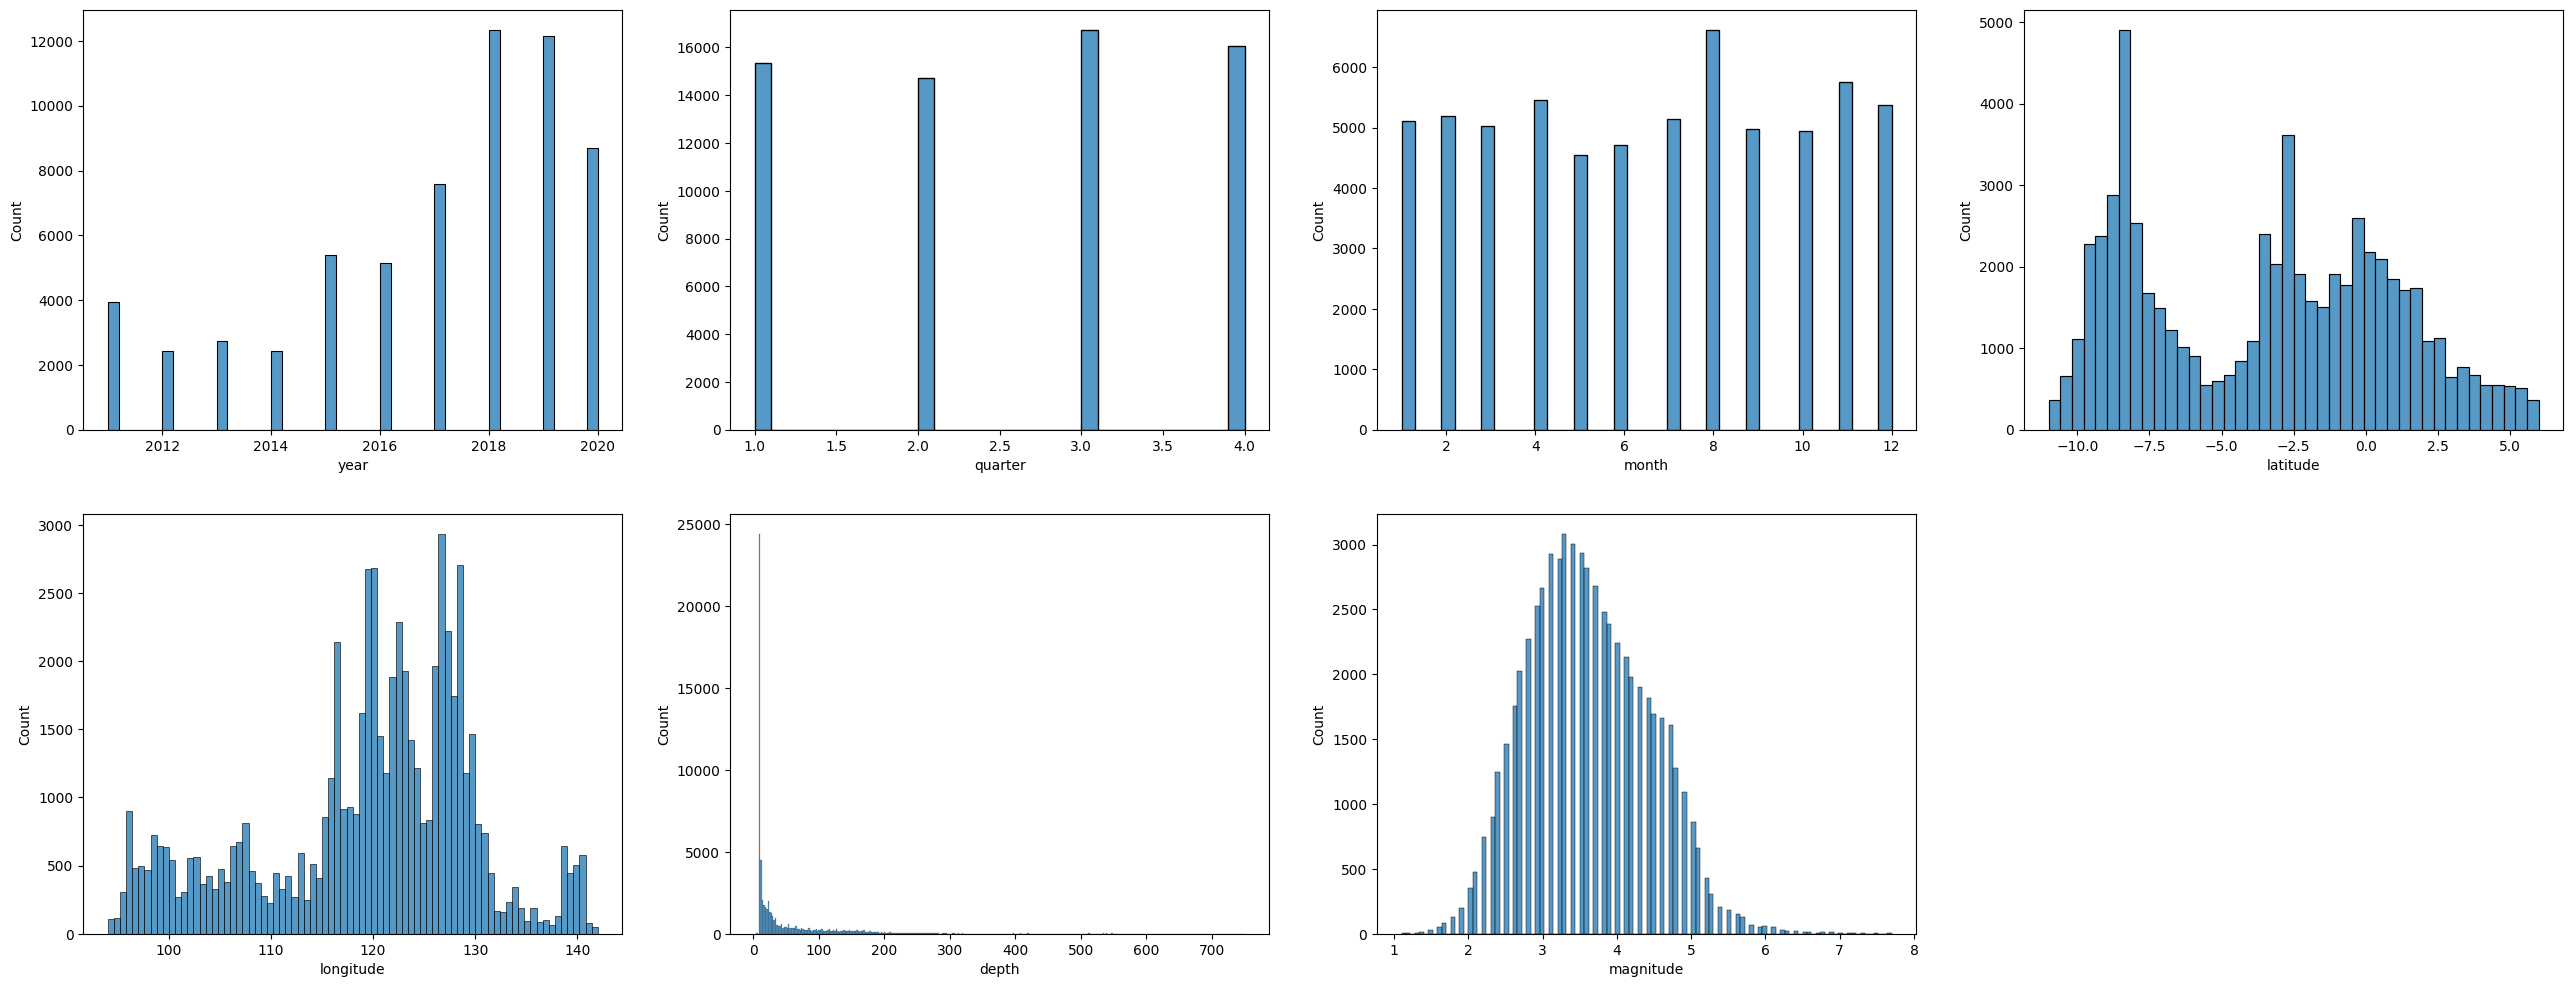

In [152]:
plt.figure(figsize = (32,12)) 
subplot = 1
for i in numf:
    plt.subplot(2,4,subplot)
    sns.histplot(data = df, x = i)
    subplot = subplot + 1
    
plt.show()

**Categorical Features Distribution**

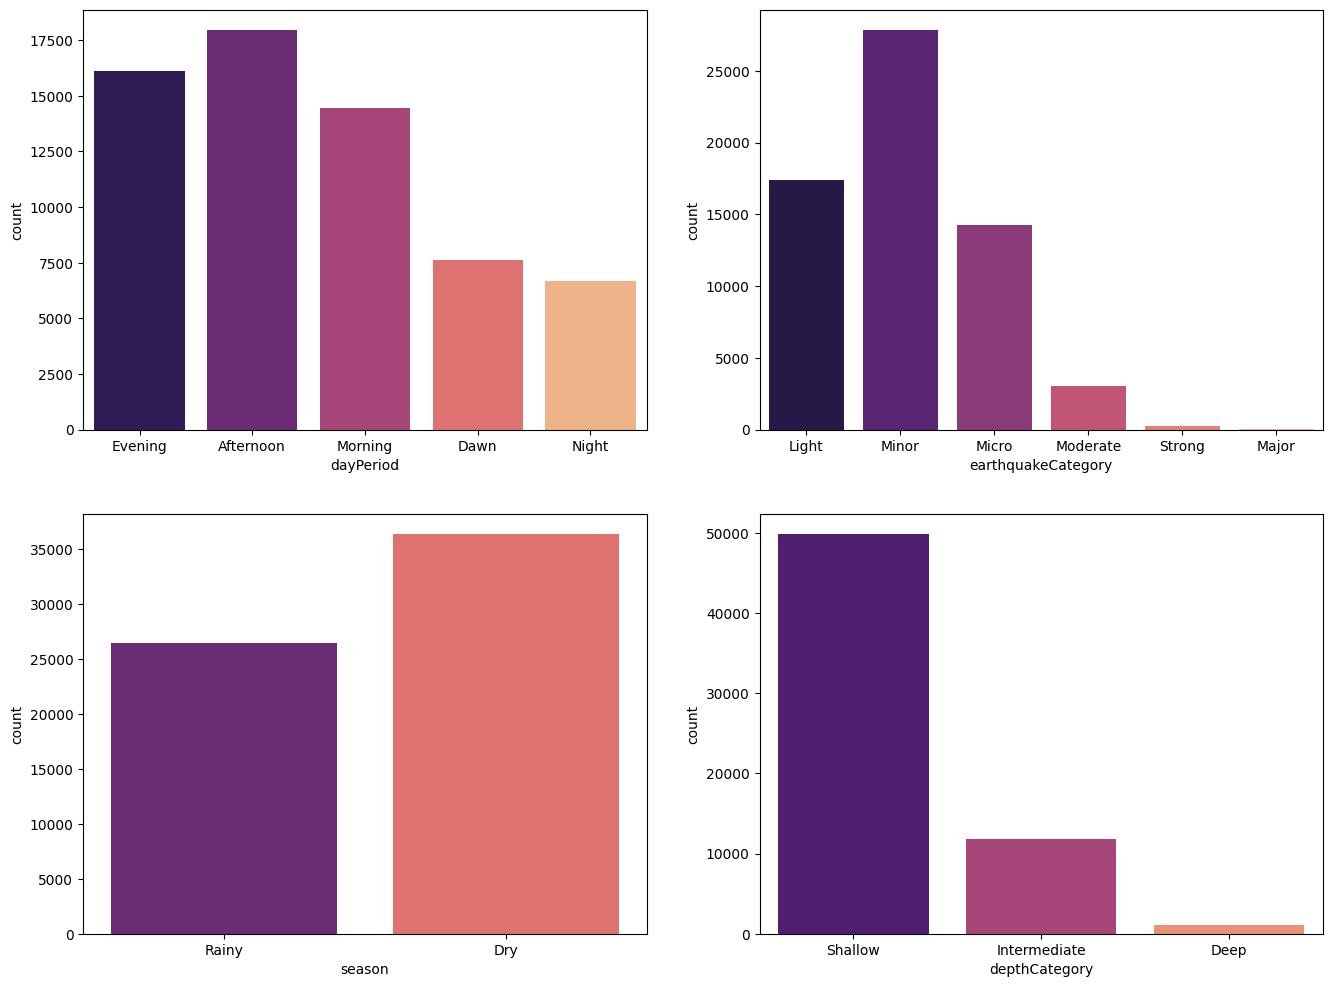

In [153]:
plt.figure(figsize = (16,12)) 
subplot = 1
for i in catf:
    plt.subplot(2,2,subplot)
    sns.countplot(data = df, x = i, palette = 'magma')
    subplot = subplot + 1
    
plt.show()

**Earthquake Amount based on Categorical Features**

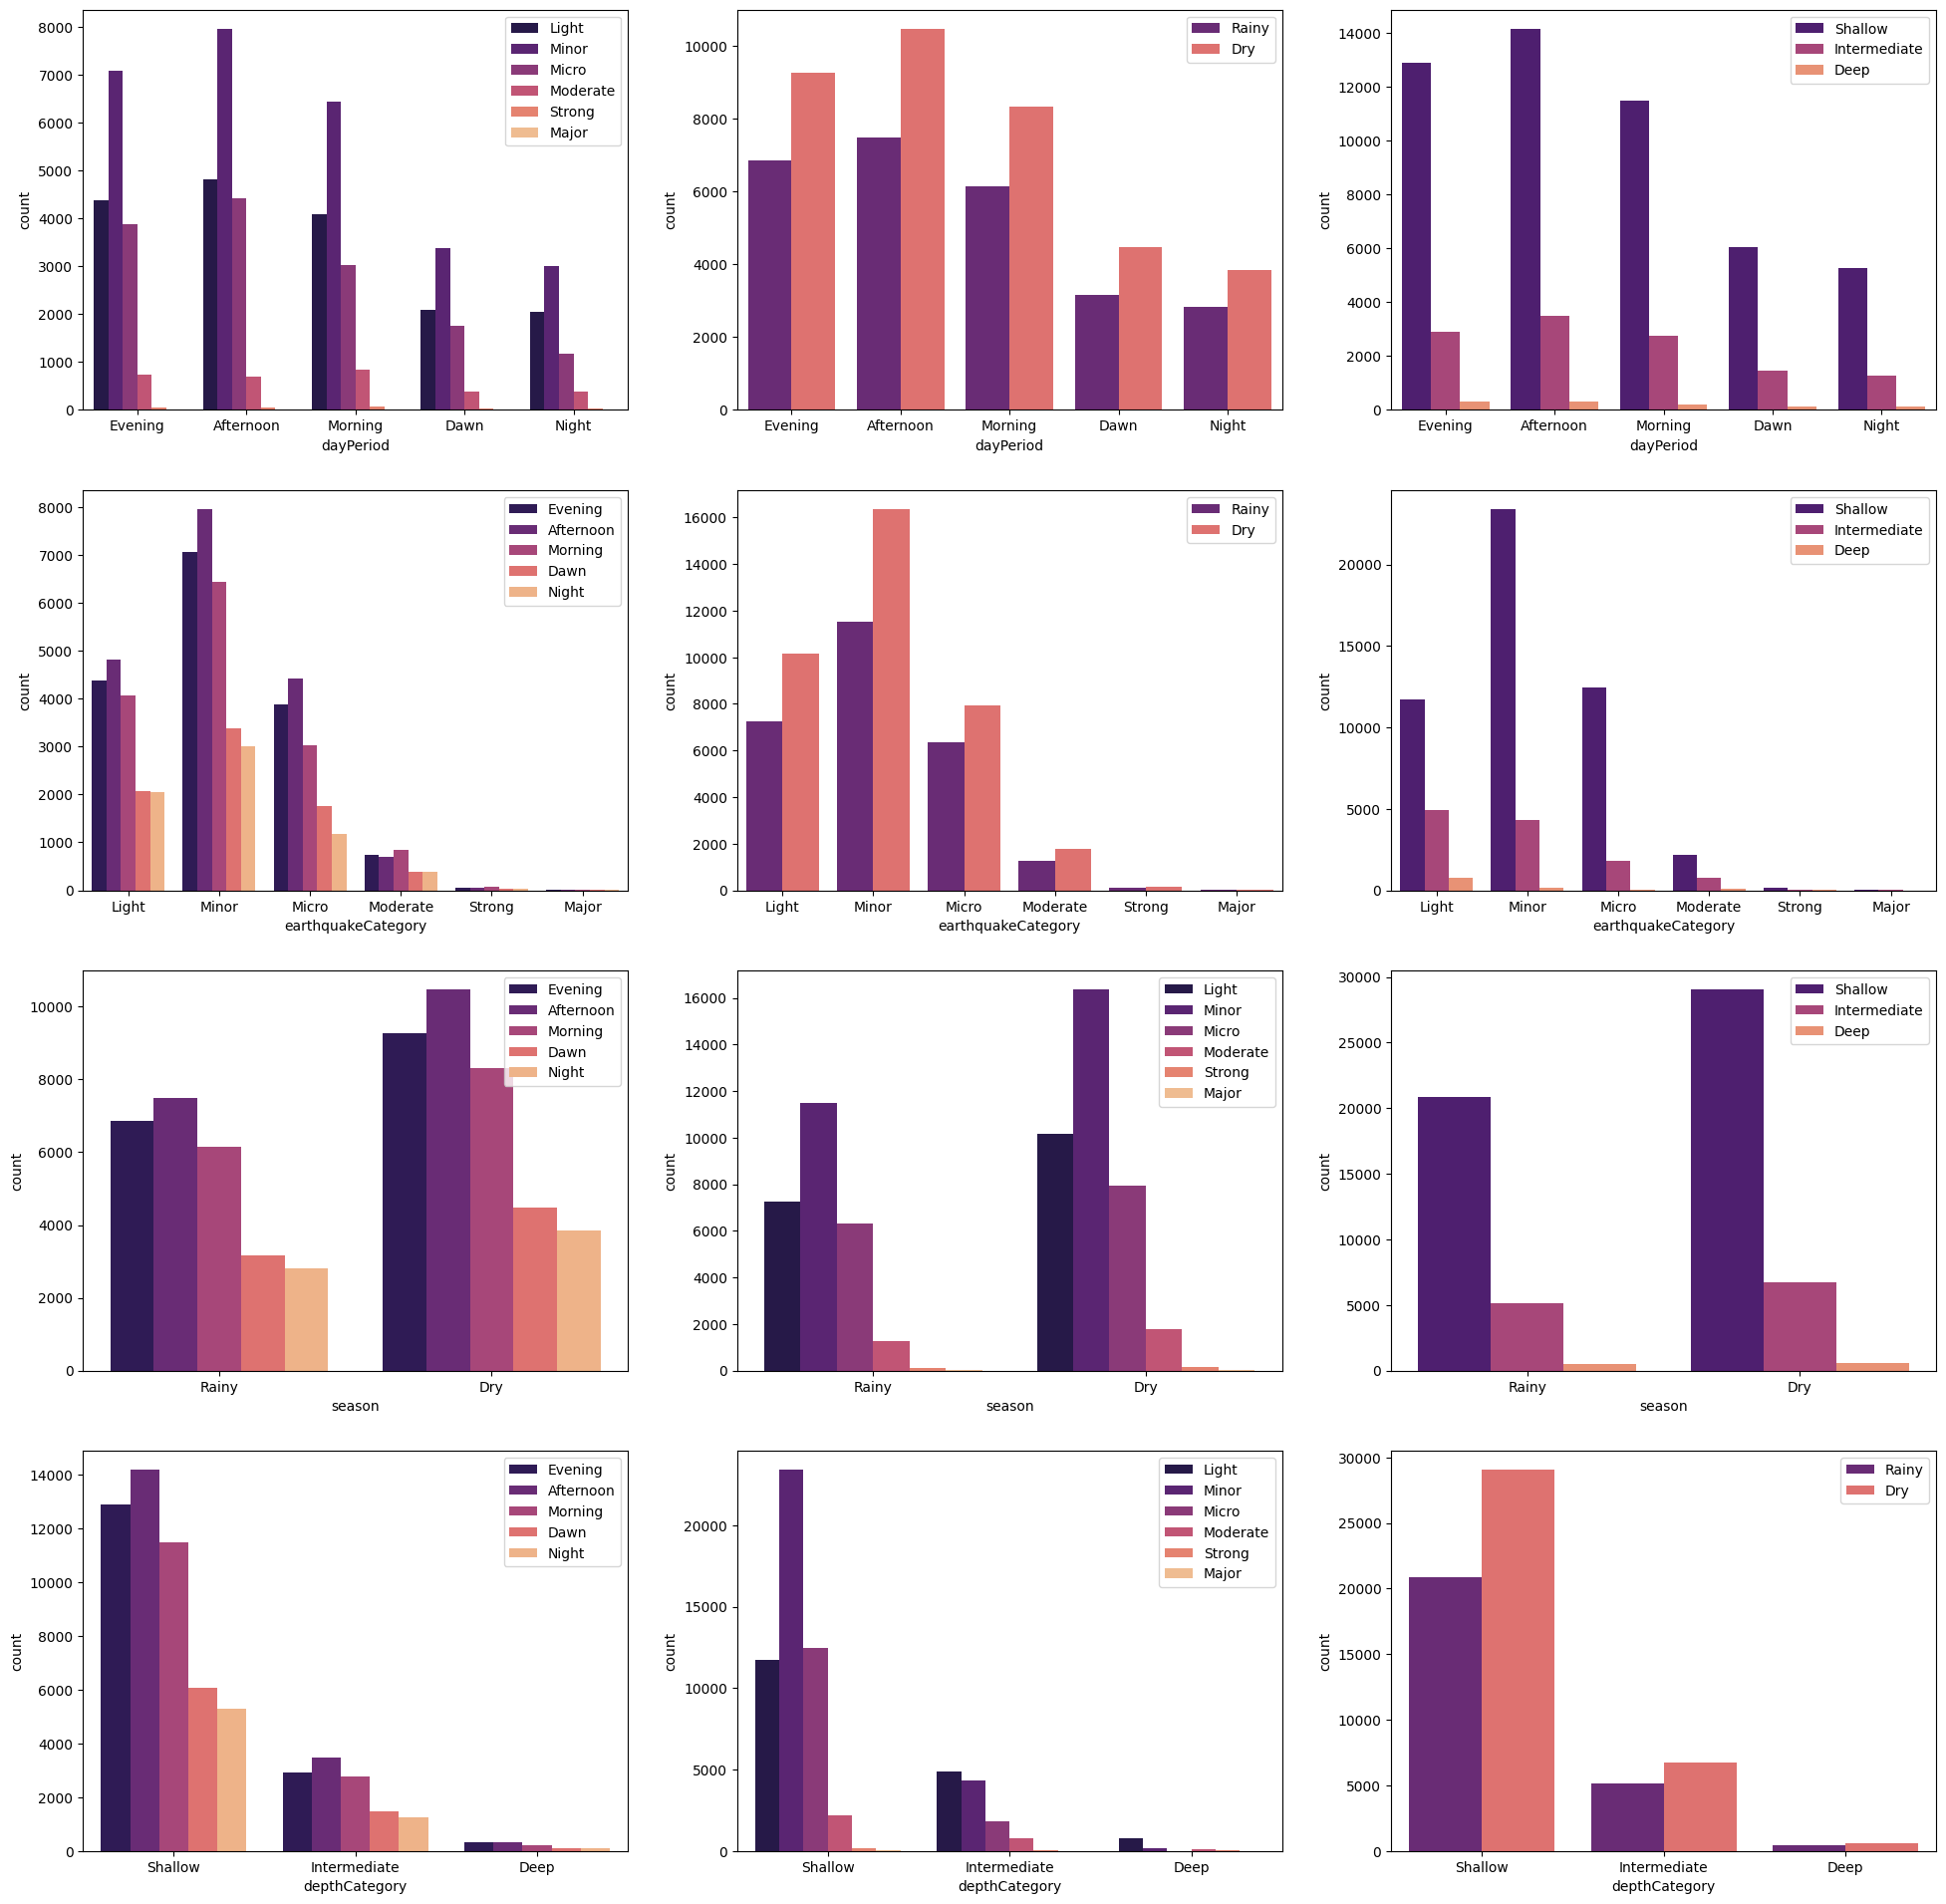

In [154]:
subplot = 1
plt.figure(figsize = (24,24))
for i in catf:
    for j in catf:
        if (i==j):
            pass
        else:
            plt.subplot(4,3,subplot)
            sns.countplot(data = df, x = i,hue= j,palette = 'magma')
            plt.legend(loc=1) 
            subplot = subplot +1
plt.show()

**Earthquake Amount each Year from 2011 to 2020**

features: dayPeriod, earthquakeCategory, season, depthCategory, quarter

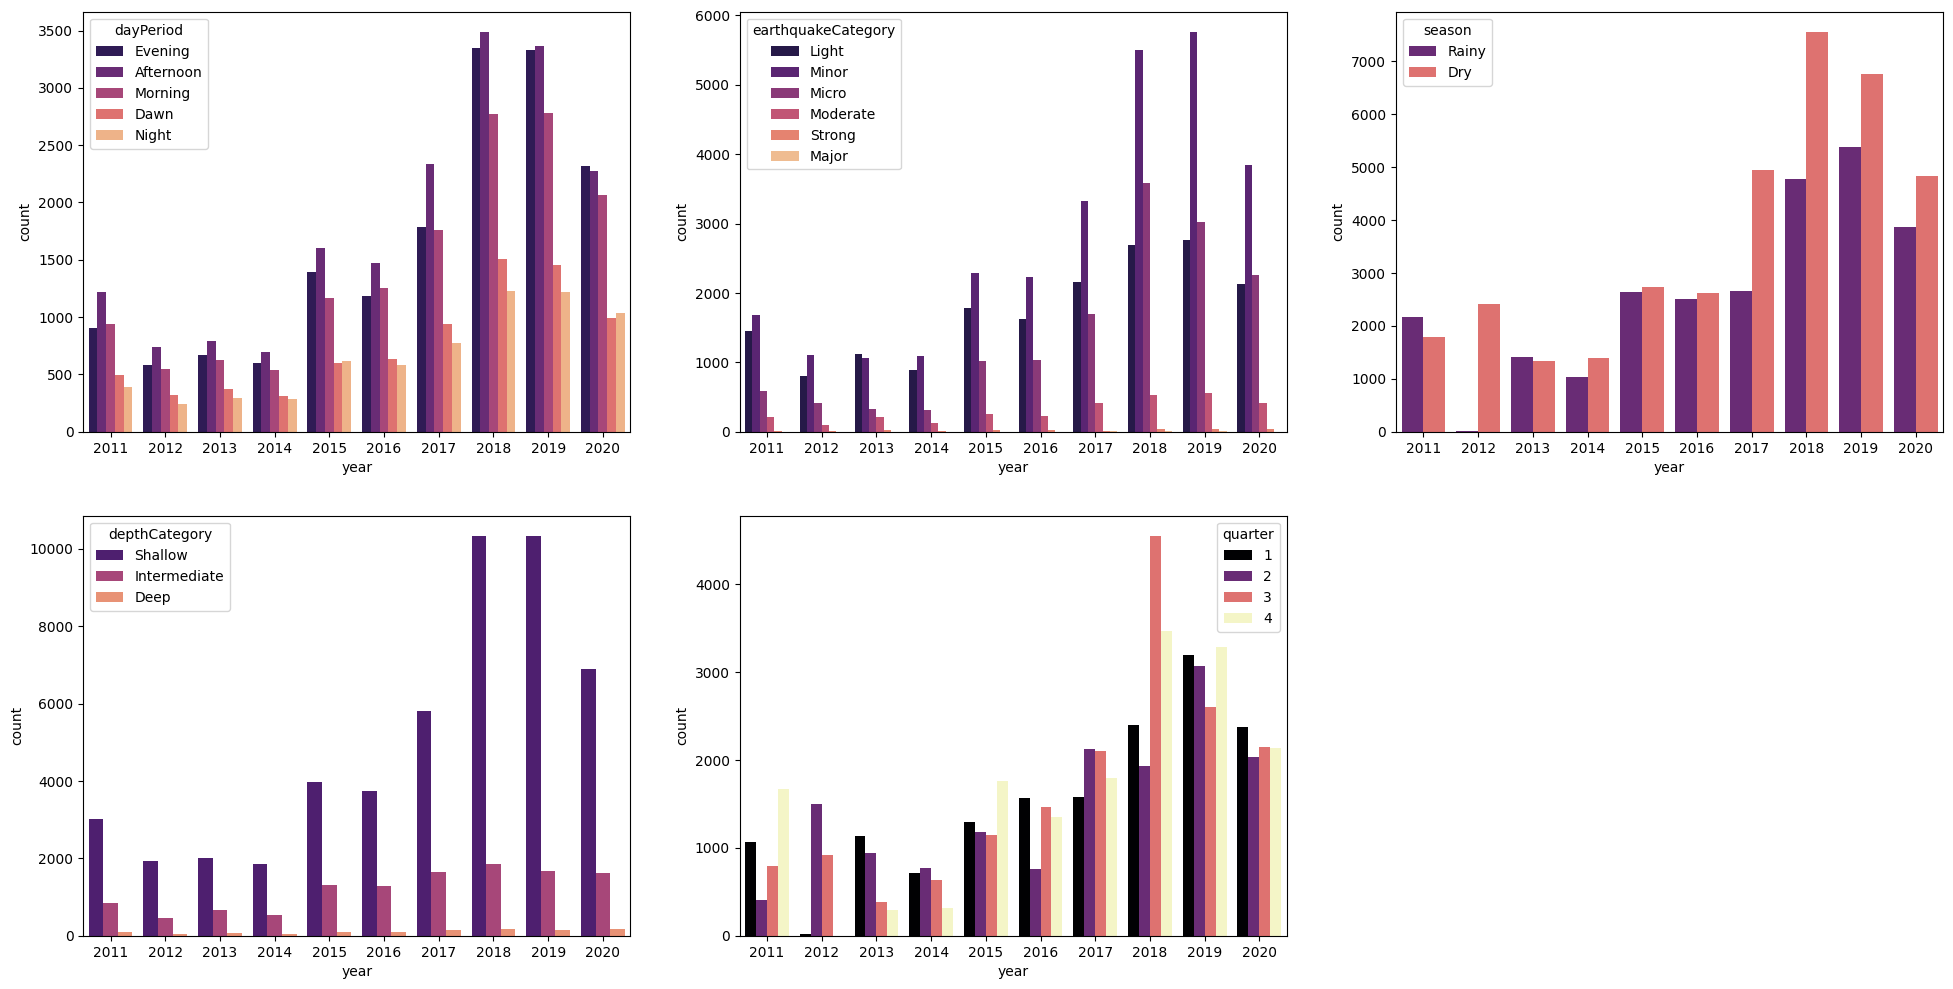

In [155]:
tempList = ['dayPeriod', 'earthquakeCategory', 'season', 'depthCategory', 'quarter']
subplot = 1
plt.figure(figsize = (24,12))
for i in tempList:
    plt.subplot(2,3,subplot)
    sns.countplot(data = df, x = 'year',hue = i, palette = 'magma')
    subplot = subplot + 1
plt.show()

**Magnitude Value Distribution**

features: dayPeriod, season, depthCategory, quarter

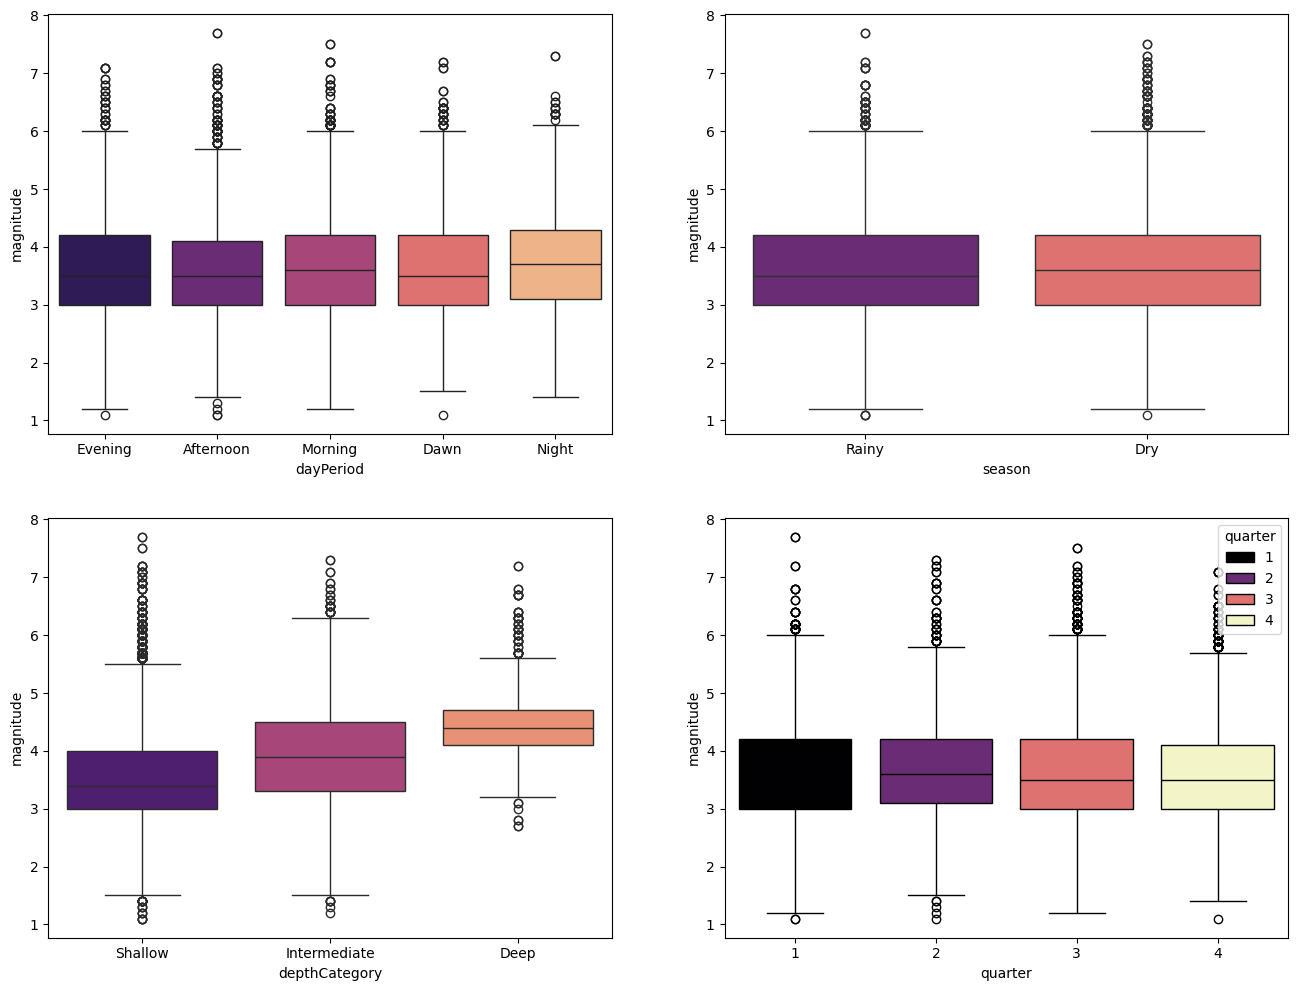

In [156]:
tempList = ['dayPeriod', 'season', 'depthCategory', 'quarter']
subplot = 1
plt.figure(figsize = (16,12))
for i in tempList:
    plt.subplot(2,2,subplot)
    sns.boxplot(data = df, y = 'magnitude', x = i, hue = i, palette = 'magma')
    subplot = subplot + 1
plt.show()

**Histplot Magnitude Value Distribution**

features: dayPeriod, season, depthCategory, quarter

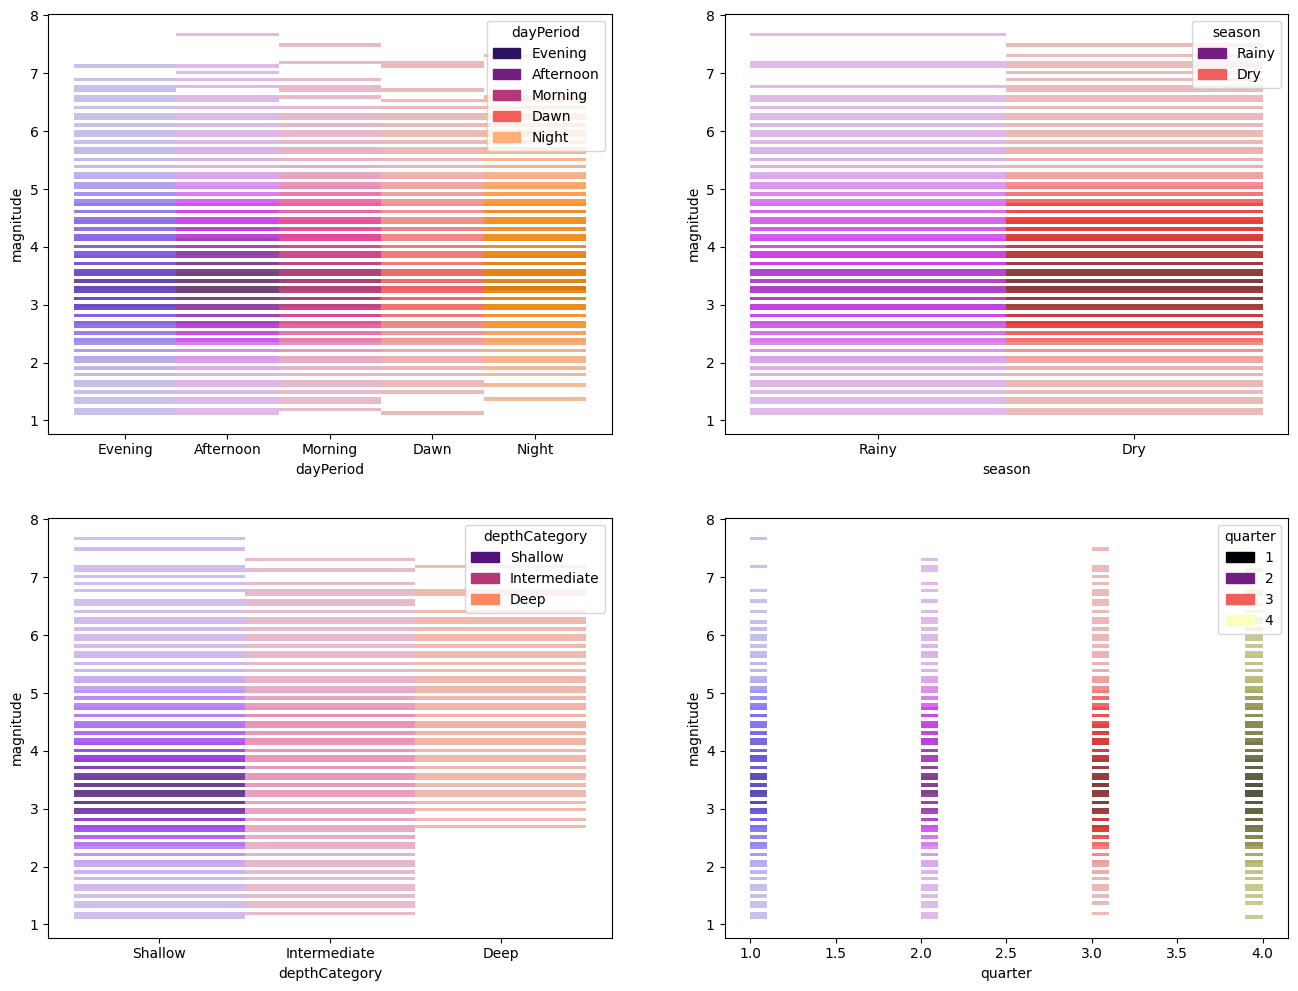

In [157]:
subplot = 1
plt.figure(figsize = (16,12))
for i in tempList:
    plt.subplot(2,2,subplot)
    sns.histplot(data = df, y = 'magnitude', x = i, hue = i, palette = 'magma')
    subplot = subplot + 1
plt.show()

**Clustering Longitude and Latitude to Create New Feature: Area**

Standarized data

In [158]:
tempDf = df[['longitude','latitude']].copy()
ms = MinMaxScaler()
tempDf = ms.fit_transform(tempDf)
tempDf = pd.DataFrame(tempDf, columns=['longitude','latitude'])
tempDf.head()

,longitude,latitude
0,0.731972,0.806471
1,0.579200,0.084118
2,0.205502,0.480588
3,0.093997,0.819412
4,0.128595,0.456471


Find optimum cluster amount: elbow method

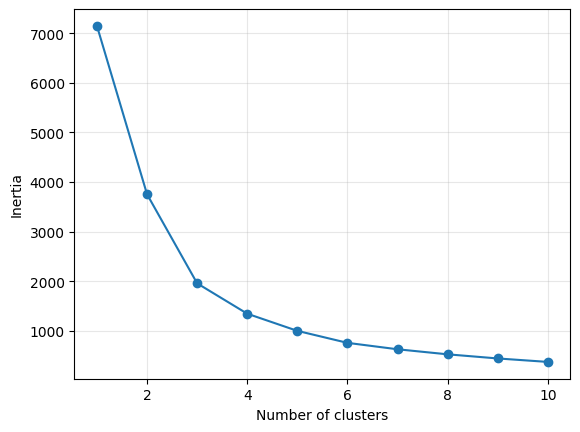

In [159]:
inertia = []
for i in range(1,11):
    kMeans = KMeans(n_clusters = i)
    kMeans.fit(tempDf[['longitude','latitude']])  
    inertia.append(kMeans.inertia_)  
plt.plot(range(1,11), inertia, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(alpha = 0.3) 
plt.show()

Print the number of cluster vs inertia values

In [160]:
for i, value in enumerate(inertia, 1):
    print(f'Number of Clusters: {i}, Inertia: {value}')

Number of Clusters: 1, Inertia: 7147.950978439927
Number of Clusters: 2, Inertia: 3751.9123528099435
Number of Clusters: 3, Inertia: 1955.6570951674705
Number of Clusters: 4, Inertia: 1343.3001083795764
Number of Clusters: 5, Inertia: 997.388393918635
Number of Clusters: 6, Inertia: 755.4293161712837
Number of Clusters: 7, Inertia: 625.8844206320539
Number of Clusters: 8, Inertia: 523.9758956877322
Number of Clusters: 9, Inertia: 440.8104791710348
Number of Clusters: 10, Inertia: 370.8777073227109


The output shows the inertia values for different numbers of clusters (ranging from 1 to 10) based on the k-means clustering applied to the 'longitude' and 'latitude' columns. Let's interpret and conclude:

1. Inertia Values:
- As the number of clusters increases, the inertia values decrease.
- Inertia is a measure of how compact the clusters are. Lower inertia values indicate more compact and well-separated clusters.

2. Elbow Point:
- The "elbow" of the curve is a point where adding more clusters does not significantly reduce the inertia.
- In this case, we can observe a decreasing trend in inertia as the number of clusters increases, and the rate of decrease slows down after a certain point.

3. Interpretation:
- The inertia values provide insights into the trade-off between model complexity (number of clusters) and the goodness of fit.
- Lower inertia values generally indicate better clustering solutions, but it's essential to balance this with the simplicity of the model.

4. Elbow Method:
- The "elbow" in the curve, where the rate of inertia reduction slows down, is often considered a potential optimal number of clusters.
- Looking at the results, the inertia reduction slows down notably around 4 or 5 clusters.

5. Conclusion:
- Based on the elbow method, an optimal number of clusters might be around 4 or 5.

6. Further Analysis:
- Visual inspection of the inertia values and consideration of the elbow point can guide the selection of an appropriate number of clusters.
- Further analysis, such as silhouette analysis or domain-specific knowledge, may be useful for refining the choice of clusters.

Find optimum cluster amount: sillhouette method


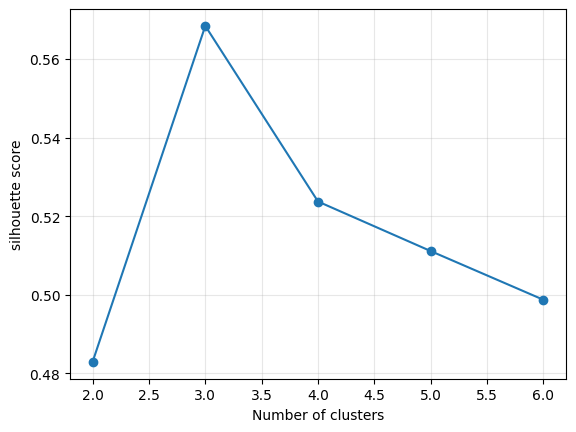

In [161]:
ss = []
for i in range(2,7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tempDf[['longitude','latitude']])
    cluster_labels = kmeans.labels_
    ss.append(silhouette_score(tempDf[['longitude','latitude']], cluster_labels)) 
plt.plot(range(2,7), ss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.grid(alpha = 0.3)

Print the number of cluster vs silhoutte score values

In [162]:
for i, value in enumerate(ss, 2):
    print(f'Number of Clusters: {i}, Silhouette Score: {value}')

Number of Clusters: 2, Silhouette Score: 0.48292747204584235
Number of Clusters: 3, Silhouette Score: 0.5684018199435413
Number of Clusters: 4, Silhouette Score: 0.5237269649163581
Number of Clusters: 5, Silhouette Score: 0.5111175162200211
Number of Clusters: 6, Silhouette Score: 0.49872867964983425


Based on the scores, the solution with 3 clusters appears to have the highest silhouette score, indicating well-defined and separated clusters.

Applying Kmean Clustering


In [163]:
kMeans = KMeans(n_clusters=3)
kMeans.fit(tempDf[['longitude','latitude']]) 
df['area'] = kMeans.labels_
df.head()

,year,quarter,month,latitude,longitude,depth,magnitude,dayPeriod,earthquakeCategory,season,depthCategory,area
0,2011,1,1,2.71,129.14,53,4.9,Evening,Light,Rainy,Shallow,0
1,2011,1,1,-9.57,121.81,12,3.2,Afternoon,Minor,Rainy,Shallow,1
2,2011,1,1,-2.83,103.88,31,3.5,Afternoon,Minor,Rainy,Shallow,2
3,2011,1,1,2.93,98.53,112,3.3,Morning,Minor,Rainy,Intermediate,2
4,2011,1,1,-3.24,100.19,12,3.6,Morning,Minor,Rainy,Shallow,2


Plotting results

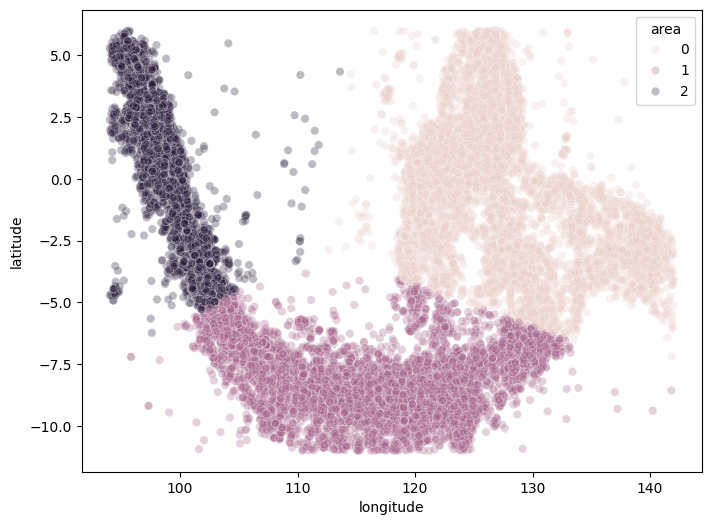

In [164]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, y = 'latitude', x = 'longitude', hue = 'area', alpha = 0.3)
plt.show()

In [166]:
for label in [0, 1, 2]:
    subset = df[df['area'] == label]
    print(f"\nArea {label} Coordinates:")
    print(subset[['latitude', 'longitude']])



Area 0 Coordinates:
       latitude  longitude
0          2.71     129.14
6         -3.64     128.48
9          0.90     122.48
10         2.32     128.25
12        -0.13     122.67
...         ...        ...
62854     -3.44     131.28
62856     -2.06     122.48
62857     -2.66     128.73
62858     -2.68     128.72
62859     -1.23     120.96

[31962 rows x 2 columns]

Area 1 Coordinates:
       latitude  longitude
1         -9.57     121.81
5         -7.00     105.41
7         -6.00     117.84
8         -6.97     107.37
11        -7.53     120.41
...         ...        ...
62844     -8.60     118.38
62845     -8.97     122.32
62846     -8.97     122.32
62847     -8.74     118.94
62860     -6.38     103.78

[23905 rows x 2 columns]

Area 2 Coordinates:
       latitude  longitude
2         -2.83     103.88
3          2.93      98.53
4         -3.24     100.19
19        -2.96     101.04
20        -4.56     101.26
...         ...        ...
62841      0.40      97.81
62842      0.31      

**Earthquake Amount based on Area with Other Features**

features: quarter, dayPeriod, earthquakeCategory, season, depthCategory

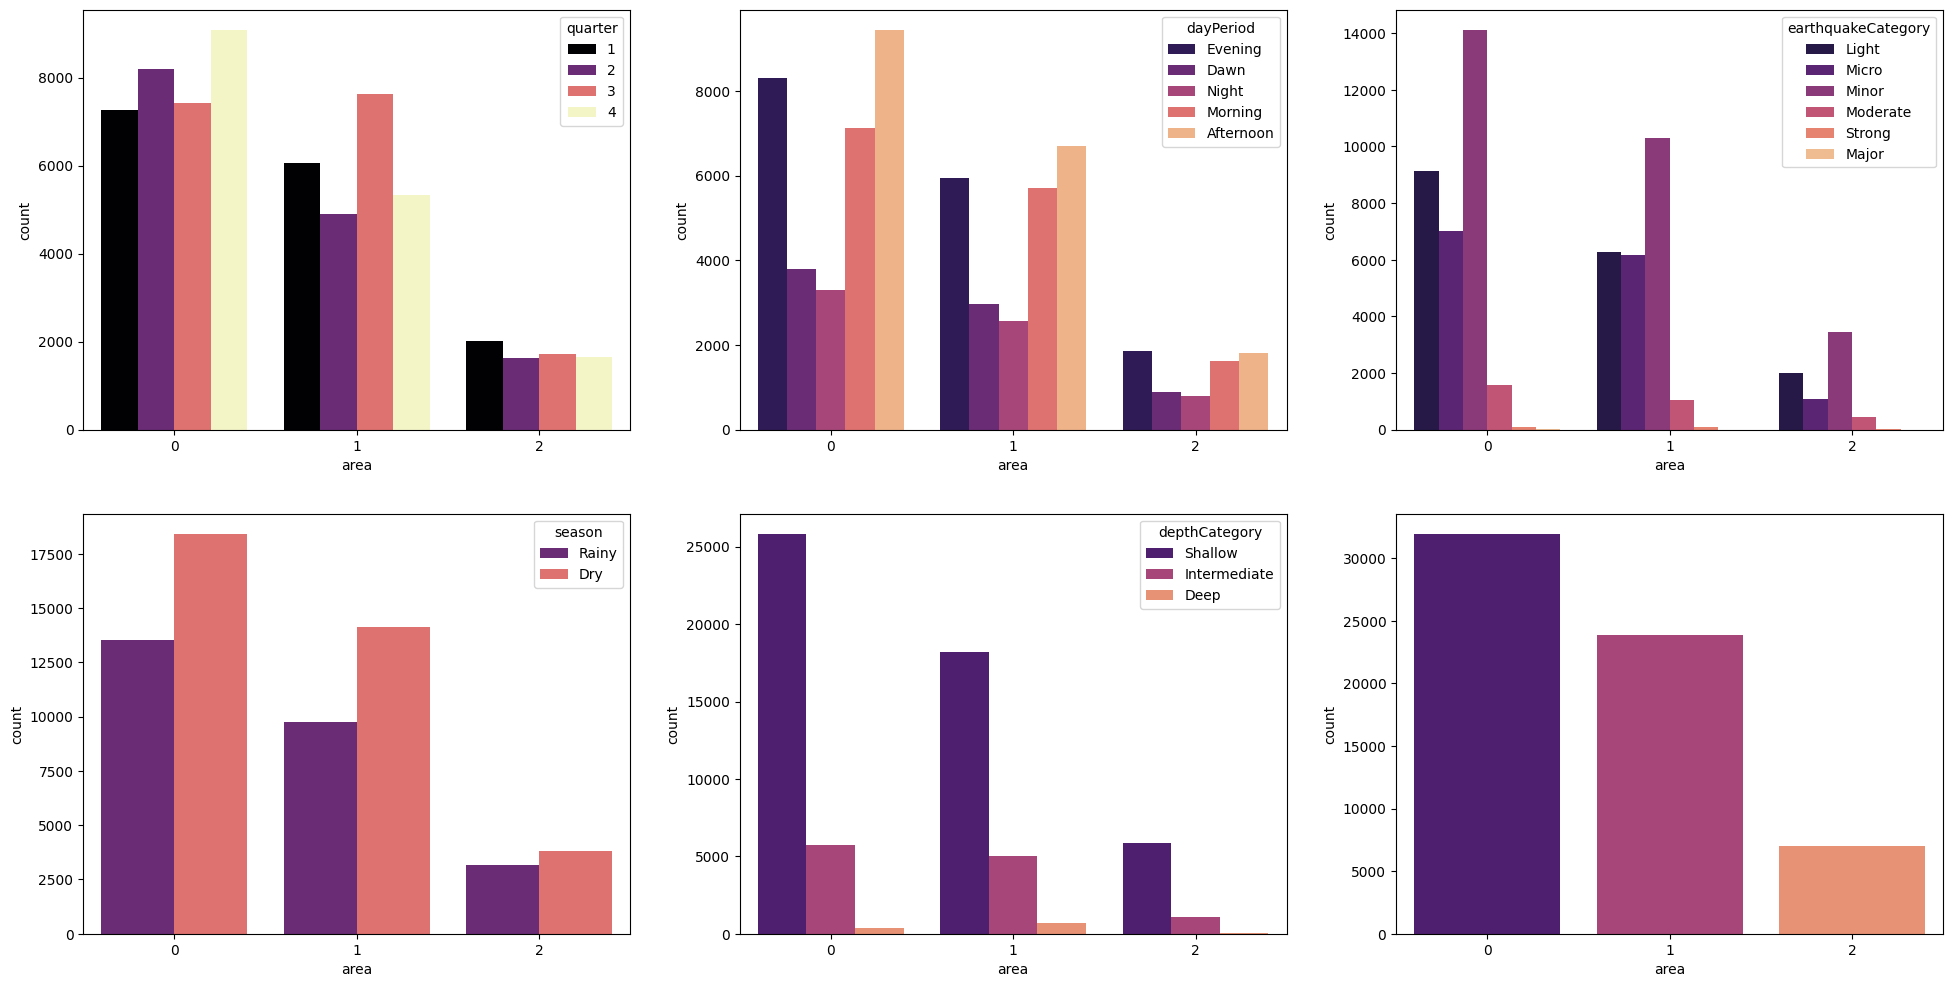

In [167]:
tempList = ['quarter', 'dayPeriod', 'earthquakeCategory', 'season', 'depthCategory']
subplot = 1
plt.figure(figsize = (24,12))
for i in tempList:
    plt.subplot(2,3,subplot)
    sns.countplot(data = df, x = 'area', hue = i, palette = 'magma')
    subplot = subplot +1
plt.subplot(2,3,6)
sns.countplot(data = df, x = 'area', palette = 'magma')
plt.show()

**Clustering Features to Define Earthquake Type in Indonesia 1**

features: dayPeriod,earthquakeCategory,season,depthCategory,area

Encode categorial features

In [168]:
tempDf = df[['dayPeriod','earthquakeCategory','season','depthCategory','area']].copy()
le = LabelEncoder()
for i in tempDf.columns.tolist():
    tempDf[i] = le.fit_transform(tempDf[i])
tempDf.head()

,dayPeriod,earthquakeCategory,season,depthCategory,area
0,2,0,1,2,0
1,0,3,1,2,1
2,0,3,1,2,2
3,3,3,1,1,2
4,3,3,1,2,2


Standardized Data

In [169]:
ms = MinMaxScaler()
tempDf = ms.fit_transform(tempDf)
tempDf = pd.DataFrame(tempDf, columns=['dayPeriod','earthquakeCategory','season','depthCategory','area'])
tempDf.head()

,dayPeriod,earthquakeCategory,season,depthCategory,area
0,0.50,0.0,1.0,1.0,0.0
1,0.00,0.6,1.0,1.0,0.5
2,0.00,0.6,1.0,1.0,1.0
3,0.75,0.6,1.0,0.5,1.0
4,0.75,0.6,1.0,1.0,1.0


Find optimum cluster amount: elbow method

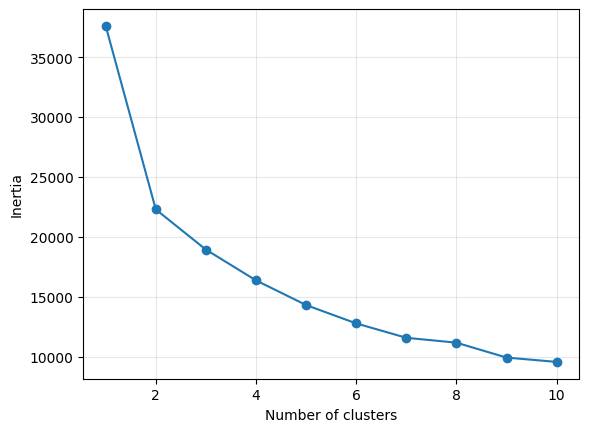

In [170]:
inertia = []
for i in range(1,11):
    kMeans = KMeans(n_clusters = i)
    kMeans.fit(tempDf[['dayPeriod','earthquakeCategory','season','depthCategory','area']])  
    inertia.append(kMeans.inertia_)  
plt.plot(range(1,11), inertia, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(alpha = 0.3) 
plt.show()

Find optimum cluster amount: sillhouette method

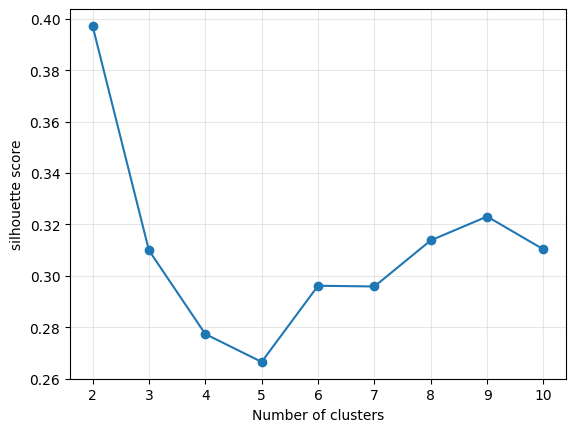

In [171]:
ss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tempDf[['dayPeriod','earthquakeCategory','season','depthCategory','area']])
    cluster_labels = kmeans.labels_
    ss.append(silhouette_score(tempDf[['dayPeriod','earthquakeCategory','season','depthCategory','area']], cluster_labels)) 
plt.plot(range(2,11), ss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.grid(alpha = 0.3)
plt.show()

Applying kmeans clustering

In [172]:
kMeans = KMeans(n_clusters=9)
kMeans.fit(tempDf[['dayPeriod','earthquakeCategory','season','depthCategory','area']]) 
df['cluster1_9'] = kMeans.labels_
df.head()

,year,quarter,month,latitude,longitude,depth,magnitude,dayPeriod,earthquakeCategory,season,depthCategory,area,cluster1_9
0,2011,1,1,2.71,129.14,53,4.9,Evening,Light,Rainy,Shallow,0,1
1,2011,1,1,-9.57,121.81,12,3.2,Afternoon,Minor,Rainy,Shallow,1,5
2,2011,1,1,-2.83,103.88,31,3.5,Afternoon,Minor,Rainy,Shallow,2,3
3,2011,1,1,2.93,98.53,112,3.3,Morning,Minor,Rainy,Intermediate,2,3
4,2011,1,1,-3.24,100.19,12,3.6,Morning,Minor,Rainy,Shallow,2,3


Plotting result

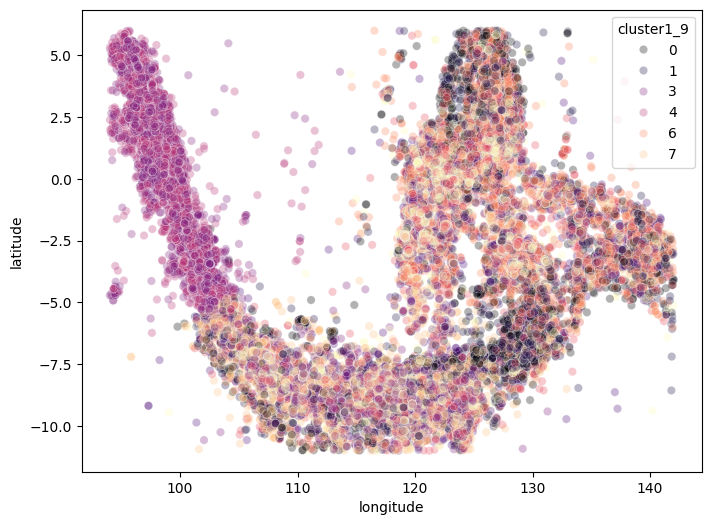

In [173]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, y = 'latitude', x = 'longitude', hue = 'cluster1_9', alpha = 0.3, palette = 'magma')
plt.show()

Cluster summary

In [174]:
tempList1 = ['latitude','longitude','depth','magnitude']
tempList2 = ['earthquakeType','dataAmount','percentage'] + tempList1
eT = 1
tempList3 = []
dflen = len(df)
for i in df['cluster1_9'].unique().tolist():
    tempList4 = []
    tempList4.append(i)
    typelen = len(df.loc[df['cluster1_9']==i])
    tempList4.append(typelen)
    typepercent = round((typelen/dflen)*100,2)
    tempList4.append(typepercent)
    for j in tempList1:
        q25 = str(round(df[j].loc[df['cluster1_9']==i].min(),2))
        q75 = str(round(df[j].loc[df['cluster1_9']==i].max(),2))
        if (q25==q75):
            tempList4.append(q25)
        else:
            tempList4.append("("+q25+") - ("+q75+")")
    tempList3.append(tempList4)
tempdf = pd.DataFrame(tempList3,columns = tempList2)
tempdf

,earthquakeType,dataAmount,percentage,latitude,longitude,depth,magnitude
0,1,4593,7.31,(-11.0) - (6.0),(101.26) - (142.0),(5) - (750),(4.0) - (7.2)
1,5,7751,12.33,(-11.0) - (6.0),(101.25) - (141.93),(2) - (750),(1.1) - (7.1)
2,3,5873,9.34,(-10.99) - (6.0),(94.02) - (131.69),(5) - (750),(1.5) - (7.7)
3,8,8253,13.13,(-10.99) - (5.9),(99.06) - (141.99),(3) - (750),(1.2) - (6.8)
4,2,9429,15.00,(-11.0) - (5.99),(97.31) - (141.67),(5) - (750),(1.2) - (7.0)
5,6,10347,16.46,(-6.23) - (6.0),(113.53) - (141.97),(5) - (750),(1.1) - (7.5)
6,7,7905,12.58,(-11.0) - (-4.08),(95.83) - (133.01),(5) - (652),(1.4) - (7.3)
7,4,3825,6.08,(-6.23) - (5.99),(94.03) - (111.8),(3) - (515),(1.6) - (7.1)
8,0,4885,7.77,(-10.98) - (6.0),(99.78) - (142.0),(5) - (750),(1.5) - (7.2)


Result based on percentage

In [175]:
tempdf.sort_values(by='percentage',ascending = False)

,earthquakeType,dataAmount,percentage,latitude,longitude,depth,magnitude
5,6,10347,16.46,(-6.23) - (6.0),(113.53) - (141.97),(5) - (750),(1.1) - (7.5)
4,2,9429,15.00,(-11.0) - (5.99),(97.31) - (141.67),(5) - (750),(1.2) - (7.0)
3,8,8253,13.13,(-10.99) - (5.9),(99.06) - (141.99),(3) - (750),(1.2) - (6.8)
6,7,7905,12.58,(-11.0) - (-4.08),(95.83) - (133.01),(5) - (652),(1.4) - (7.3)
1,5,7751,12.33,(-11.0) - (6.0),(101.25) - (141.93),(2) - (750),(1.1) - (7.1)
2,3,5873,9.34,(-10.99) - (6.0),(94.02) - (131.69),(5) - (750),(1.5) - (7.7)
8,0,4885,7.77,(-10.98) - (6.0),(99.78) - (142.0),(5) - (750),(1.5) - (7.2)
0,1,4593,7.31,(-11.0) - (6.0),(101.26) - (142.0),(5) - (750),(4.0) - (7.2)
7,4,3825,6.08,(-6.23) - (5.99),(94.03) - (111.8),(3) - (515),(1.6) - (7.1)


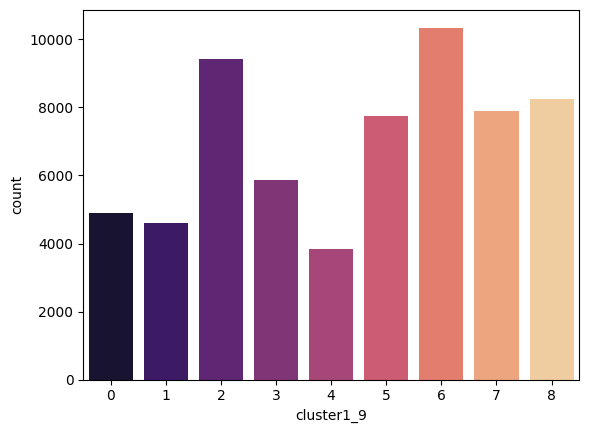

In [176]:
sns.countplot(data =df , x = 'cluster1_9', palette = 'magma')
plt.show()

**Clustering Features to Define Earthquake Type in Indonesia 2**

features: depth,magnitude

Standardized data

In [177]:
tempDf = df[['depth','magnitude']].copy()
ms = MinMaxScaler()
tempDf = ms.fit_transform(tempDf)
tempDf = pd.DataFrame(tempDf, columns=['depth','magnitude'])
tempDf.head()

,depth,magnitude
0,0.068182,0.575758
1,0.013369,0.318182
2,0.038770,0.363636
3,0.147059,0.333333
4,0.013369,0.378788


Find optimum cluster amount: elbow method

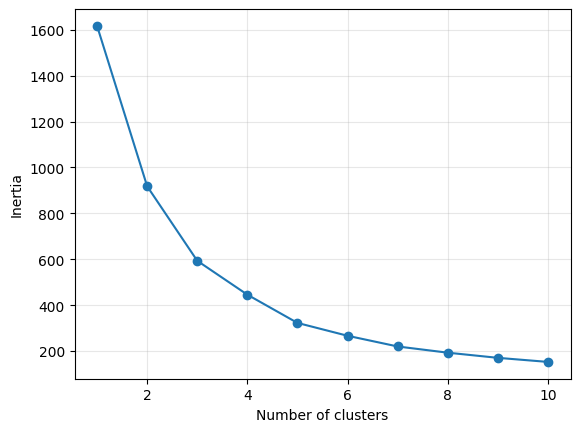

In [178]:
inertia = []
for i in range(1,11):
    kMeans = KMeans(n_clusters = i)
    kMeans.fit(tempDf[['depth','magnitude']])  
    inertia.append(kMeans.inertia_)  
plt.plot(range(1,11), inertia, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(alpha = 0.3) 
plt.show()

Find optimum cluster amount: sillhouette method

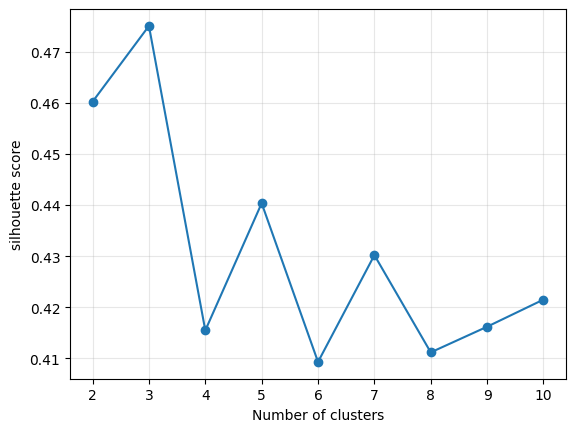

In [179]:
ss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tempDf[['depth','magnitude']])
    cluster_labels = kmeans.labels_
    ss.append(silhouette_score(tempDf[['depth','magnitude']], cluster_labels)) 
plt.plot(range(2,11), ss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.grid(alpha = 0.3)
plt.show()

Applying kmeans clustering

In [180]:
kMeans = KMeans(n_clusters=3)
kMeans.fit(tempDf[['depth','magnitude']]) 
df['cluster2_3'] = kMeans.labels_
df.head()

,year,quarter,month,latitude,longitude,depth,magnitude,dayPeriod,earthquakeCategory,season,depthCategory,area,cluster1_9,cluster2_3
0,2011,1,1,2.71,129.14,53,4.9,Evening,Light,Rainy,Shallow,0,1,1
1,2011,1,1,-9.57,121.81,12,3.2,Afternoon,Minor,Rainy,Shallow,1,5,0
2,2011,1,1,-2.83,103.88,31,3.5,Afternoon,Minor,Rainy,Shallow,2,3,0
3,2011,1,1,2.93,98.53,112,3.3,Morning,Minor,Rainy,Intermediate,2,3,0
4,2011,1,1,-3.24,100.19,12,3.6,Morning,Minor,Rainy,Shallow,2,3,0


Plotting result

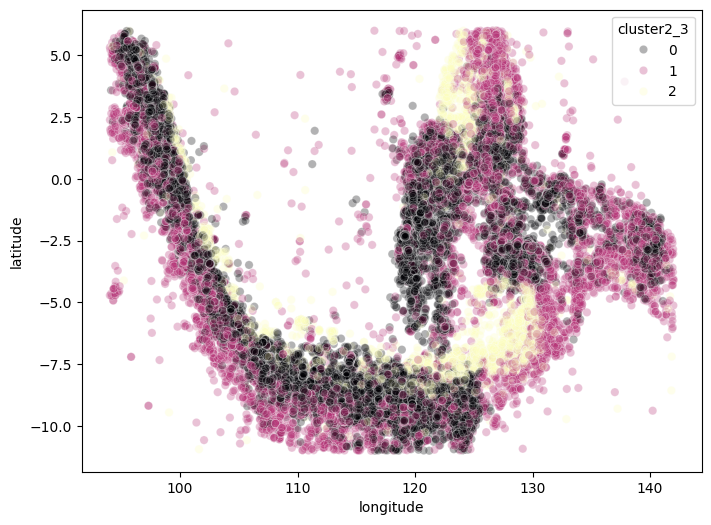

In [181]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, y = 'latitude', x = 'longitude', hue = 'cluster2_3', alpha = 0.3, palette = 'magma')
plt.show()

Cluster summary

In [182]:
tempList1 = ['depth','magnitude']
tempList2 = ['earthquakeType','dataAmount','percentage'] + tempList1
eT = 1
tempList3 = []
dflen = len(df)
for i in df['cluster2_3'].unique().tolist():
    tempList4 = []
    tempList4.append(i)
    typelen = len(df.loc[df['cluster2_3']==i])
    tempList4.append(typelen)
    typepercent = round((typelen/dflen)*100,2)
    tempList4.append(typepercent)
    for j in tempList1:
        q25 = str(round(df[j].loc[df['cluster2_3']==i].min(),2))
        q75 = str(round(df[j].loc[df['cluster2_3']==i].max(),2))
        if (q25==q75):
            tempList4.append(q25)
        else:
            tempList4.append("("+q25+") - ("+q75+")")
    tempList3.append(tempList4)
tempdf = pd.DataFrame(tempList3,columns = tempList2)
tempdf

,earthquakeType,dataAmount,percentage,depth,magnitude
0,1,23964,38.12,(5) - (149),(3.7) - (7.7)
1,0,33692,53.60,(2) - (236),(1.1) - (3.6)
2,2,5205,8.28,(137) - (750),(2.1) - (7.3)


Result based on percentage

In [183]:
tempdf.sort_values(by='percentage',ascending = False)

,earthquakeType,dataAmount,percentage,depth,magnitude
1,0,33692,53.60,(2) - (236),(1.1) - (3.6)
0,1,23964,38.12,(5) - (149),(3.7) - (7.7)
2,2,5205,8.28,(137) - (750),(2.1) - (7.3)


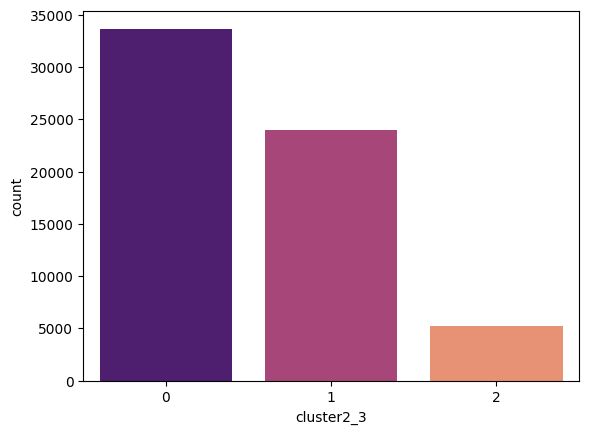

In [184]:
sns.countplot(data =df , x = 'cluster2_3', palette = 'magma')
plt.show()

## ANALYSIS AND INSIGHT

- Based on the data, from 2011 - 2020 in Indonesia, most of the earthquake happened in 2015 to 2019.
- Based on the data, from 2011 - 2020 in Indonesia, most of the earthquake happened in quarter 2 to quarter 4.
- Based on the data, from 2011 - 2020 in Indonesia, most of the earthquake happened in April to September.
- Based on the data, from 2011 - 2020 in Indonesia, most of the earthquake happened had latitude area range -8.00 to 0.00.
- Based on the data, from 2011 - 2020 in Indonesia, most of the earthquake happened had ongitude area range 115 to 125.
- Based on the data, from 2011 - 2020 in Indonesia, most of the earthquake happened had depth area range value under 60.
- Based on the data, from 2011 - 2020 in Indonesia, most of the earthquake happened had magnitude around 3 to 4.
- 2018 and 2019 were the year with highest earthquake phenomenon amount.
- Quarter 3 was quarter with the highest earthquake phenomenon amount.
- Month 8 (August) was month with the highest earthquake phenomenon amount.
- Latitude around -10 to -7.5 was latitude area with higheset phenomenon amount.
- Longitude around 115 to 130 was longitude area with highest phenomenon amount.
- Most of the eaerhquake phenomenon happened near 0 depth value.
- Magnitude around 3.3 was magnitude value with highest earthquake phenomenon amount.
- Luckily most of the earthquake phenomenon happened when people awoke (Morning, Afternoon, Evening).
- Most of the earthquake phenomenon was minor earthquake category with magnitude range 3.0 to 3.9 that felt by many people but cause no damage.
- Most of the earthquake phenomenon happened in dry season.
- Most of the earthquake phenomenon was shallow earthquake category with depth range from 0.0 to 70 .0 km.
- Most of the earthquake phenomenon happened in area 0.
- 2 Cluster summary already written above.

## SUMMARY

This is the analysis and insight of Indonesia earthquake phenomenon from 2011 to 2020 based on Earthquake Occurrence. There are also cluster that made based on the data. Thank you for reviewing and checking this notebook.